In [1]:
import pandas as pd
train_data=pd.read_csv("featureEng_train_data.csv")
test_data=pd.read_csv("featureEng_test_data.csv")

In [2]:
train_data

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Differece_in_minutes
0,0,38.0,4.7,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,14,3.029513,15.0
1,1,21.0,4.9,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,28,5.959019,10.0
2,2,29.0,4.8,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,16,1.558099,5.0
3,3,22.0,4.8,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,30,1.489800,10.0
4,4,20.0,4.7,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,17,9.315745,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27982,28946,38.0,4.5,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,16,13.894916,1097.5
27983,28947,33.0,4.6,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,33,6.105310,15.0
27984,28948,38.0,4.9,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,28,14.152801,-60.0
27985,28949,37.0,4.7,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,12.074047,-1307.5


In [3]:
train_data.drop(["Unnamed: 0","Time_Differece_in_minutes"],axis=1,inplace=True)
test_data.drop(["Unnamed: 0","Time_Differece_in_minutes"],axis=1,inplace=True)

In [4]:
train_data

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km
0,38.0,4.7,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,14,3.029513
1,21.0,4.9,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,28,5.959019
2,29.0,4.8,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,16,1.558099
3,22.0,4.8,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,30,1.489800
4,20.0,4.7,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,17,9.315745
...,...,...,...,...,...,...,...,...,...,...,...,...
27982,38.0,4.5,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,16,13.894916
27983,33.0,4.6,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,33,6.105310
27984,38.0,4.9,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,28,14.152801
27985,37.0,4.7,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,12.074047


In [5]:
train_data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Distance_km'],
      dtype='object')

In [6]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype=='object']
num_cols=[col for col in train_data.drop("Time_taken (min)",axis=1).columns if train_data[col].dtype in ['int64','float64']]

In [7]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


X_train=train_data.drop("Time_taken (min)",axis=1)
y_train=train_data['Time_taken (min)']
X_test=test_data.drop("Time_taken (min)",axis=1)
y_test=test_data['Time_taken (min)']

In [8]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance_km
0,38.0,4.7,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,3.029513
1,21.0,4.9,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,5.959019
2,29.0,4.8,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,1.558099
3,22.0,4.8,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,1.489800
4,20.0,4.7,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,9.315745
...,...,...,...,...,...,...,...,...,...,...,...
27982,38.0,4.5,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,13.894916
27983,33.0,4.6,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,6.105310
27984,38.0,4.9,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,14.152801
27985,37.0,4.7,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,12.074047


In [15]:
from skopt.space import Real
from sklearn.pipeline import Pipeline
# from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate
from skopt import BayesSearchCV

# Define pipeline
lasso_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

# # Cross-validation strategy
# kf = KFold(n_splits=10, n_repeats=3, random_state=42)

# param_space = {
#     'regressor__alpha': Real(1e-5, 10, prior='log-uniform'), 
#     'regressor__'
# }

# # Bayesian Search CV
# lasso_bayes_search = BayesSearchCV(
#     estimator=lasso_pipe,
#     search_spaces=param_space,
#     n_iter=20,
#     cv=kf,
#     n_jobs=-1,
#     random_state=42,
#     scoring='r2'
# )

# # Fit Bayesian search
# lasso_bayes_search.fit(X_train, y_train)

# # Get best parameters
# best_alpha = lasso_bayes_search.best_params_['regressor__alpha']
# print(f'Best alpha: {best_alpha}')

# # Update and fit the best model
# lasso_pipe.set_params(regressor__alpha=best_alpha)
lasso_pipe.fit(X_train, y_train)

# Cross-validate the final model
cv_results = cross_validate(
    lasso_pipe,
    X_train,
    y_train,
    # cv=kf,
    scoring='r2',
    n_jobs=-1,
    return_train_score=True
)

print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

Mean Train Score: 0.9744610689847022
Standard Deviation of Train Scores: 0.0001171193996371688
Mean Test Score: 0.8170533173724779
Standard Deviation of Test Scores: 0.0027602446881194865


Mean absolute Error: 4.857490675311538
R-squared on holdout set: 0.5746176421064872
Adjusted R-squared on holdout set: 0.5742401650221998


AttributeError: 'float' object has no attribute 'round'

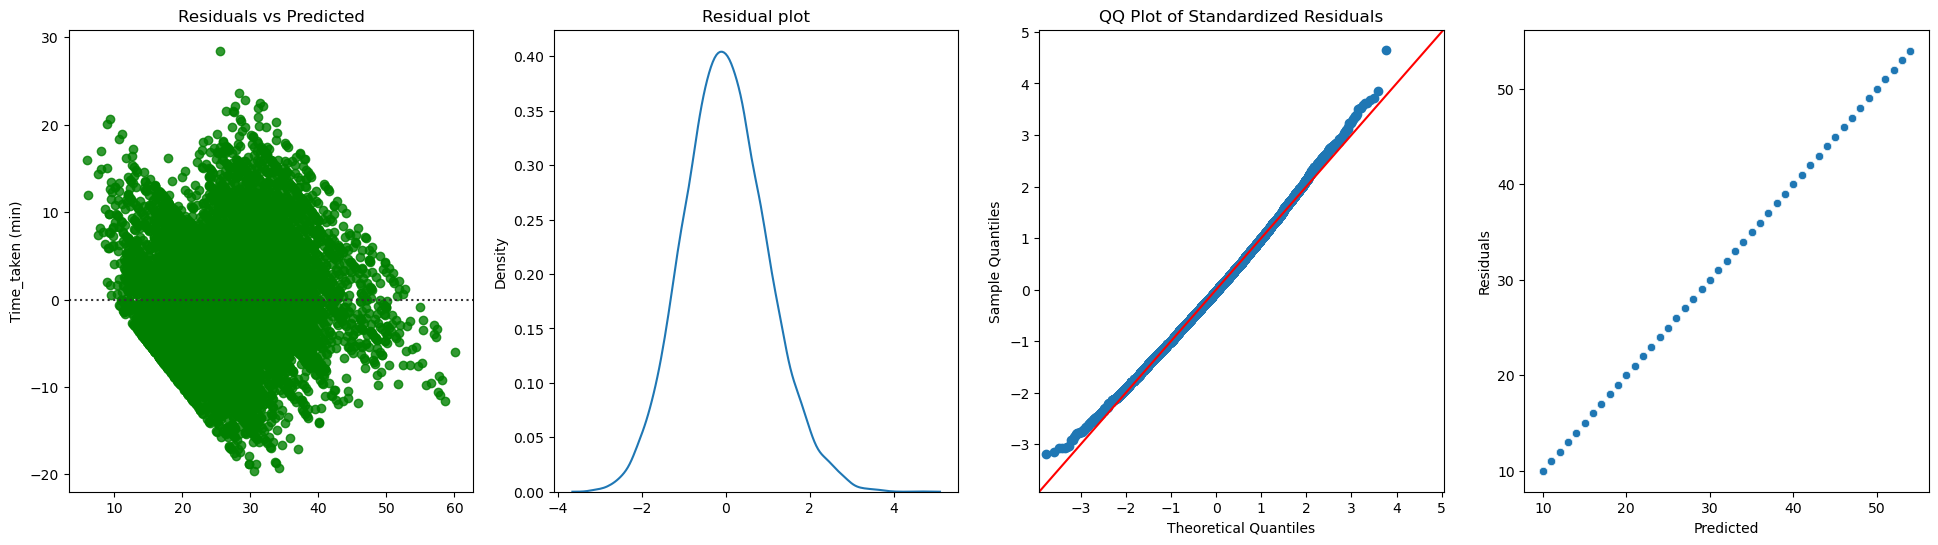

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm

sc=StandardScaler()
predictions = cross_val_predict(lasso_pipe, X_test, y_test,n_jobs=-1)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
plt.show()

In [ ]:
ridge_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor",Ridge())
])

rkf=RepeatedKFold(n_splits=10,random_state=42)
param_space = {
  'regressor__alpha': [1, 10, 100, 1000] ,
}
ridge_bayes_search = BayesSearchCV(estimator=ridge_pipe, search_spaces=param_space, n_iter=50, cv=rkf, n_jobs=-1, random_state=42)
ridge_bayes_search.fit(X_train, y_train)

best_alpha = ridge_bayes_search.best_params_['regressor__alpha']

ridge_pipe.set_params(regressor__alpha=best_alpha)
ridge_pipe.fit(X_train, y_train)

cv_results = cross_validate(ridge_pipe, X_train,y_train, cv=rkf, scoring='r2',n_jobs=-1,return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')